Easy

In [ ]:
import pandas as pd
import numpy as np

content = pd.read_csv('../marketing_campaign.csv', sep=';')
content.head(10)

: 

In [ ]:
print(f"Количество жалоб: {content['Complain'].sum()}")

Количество жалоб: 21


: 

In [ ]:
Mnt_names = [x for x in content.columns if x[:3] == "Mnt"]
Mnt_names

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

: 

In [ ]:
content['MntAll'] = content[Mnt_names].sum(axis=1)
content['Age'] = (2024 - content['Year_Birth'])
print(f"Cредний возраст покупателей: {content.loc[content['MntAll'] > 0, 'Age'].mean()}")

Cредний возраст покупателей: 55.19419642857143


: 

In [ ]:
print(f"Средний возраст всех людей: {content['Age'].mean()}")

Средний возраст всех людей: 55.19419642857143


: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Gr_names = ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'Age']

: 

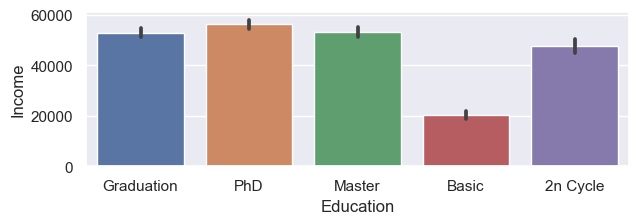

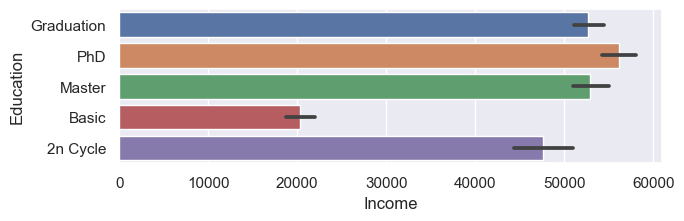

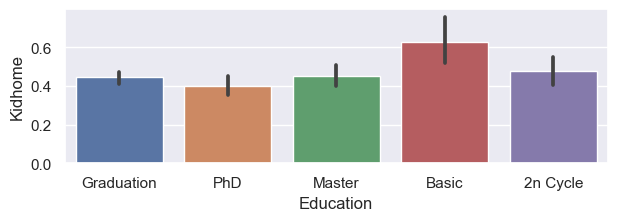

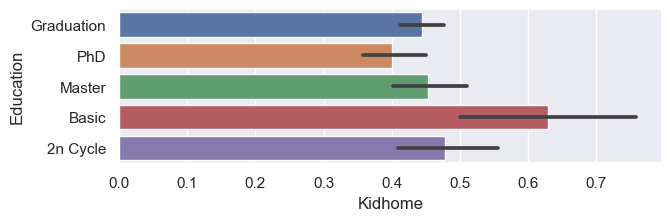

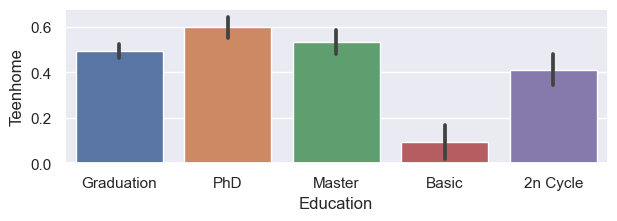

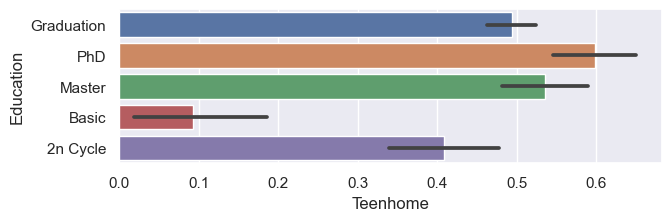

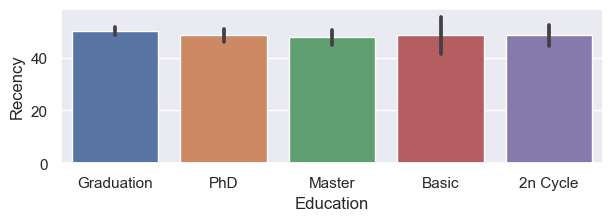

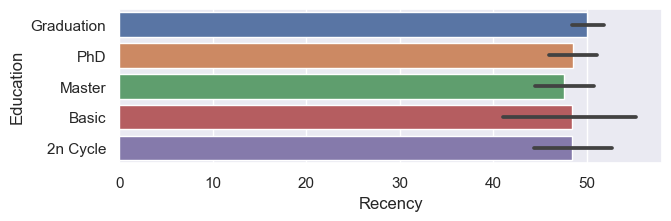

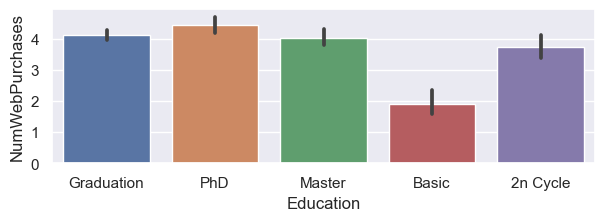

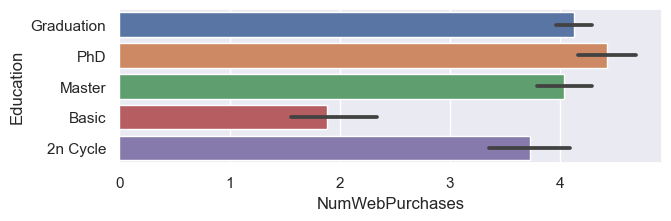

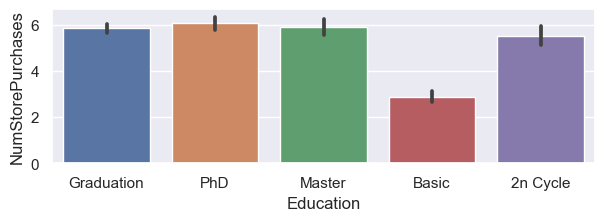

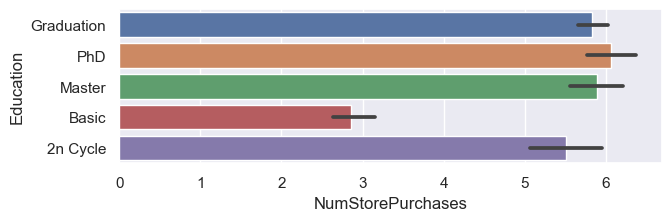

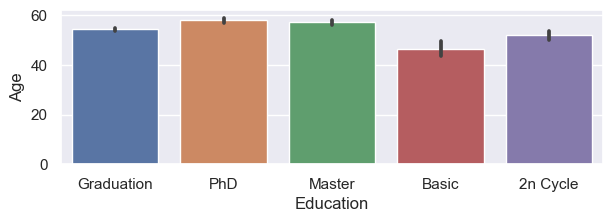

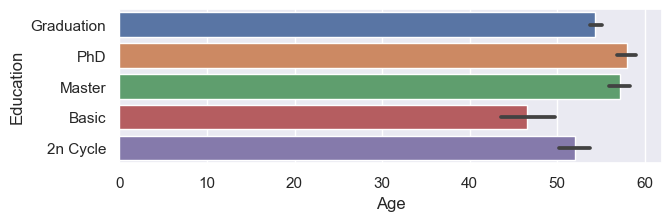

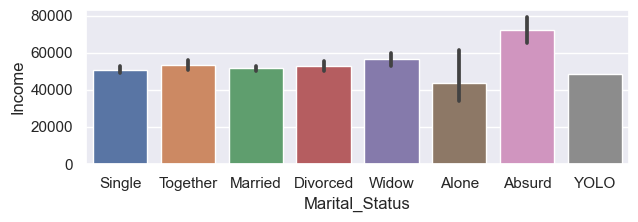

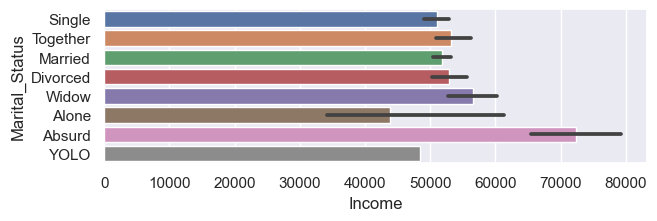

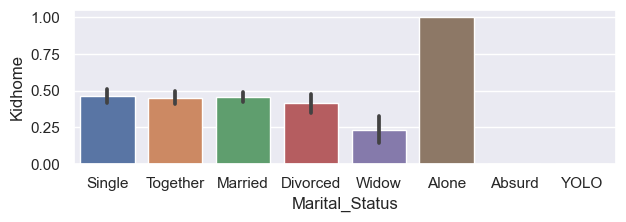

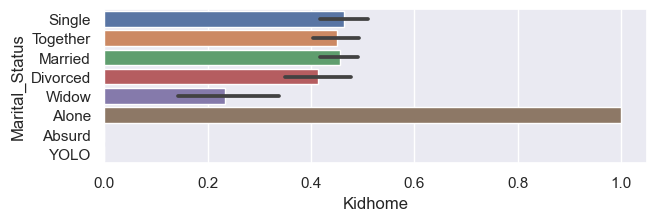

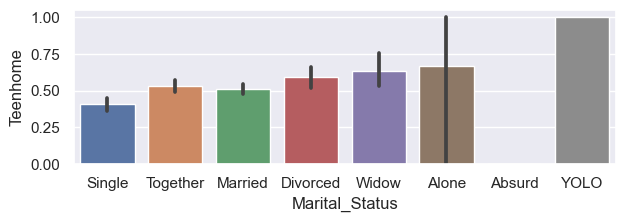

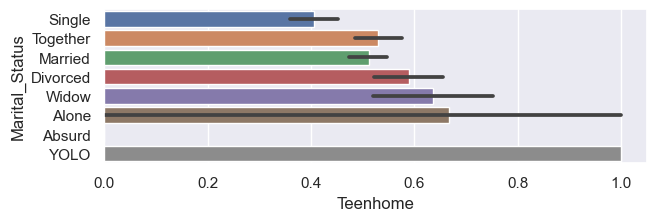

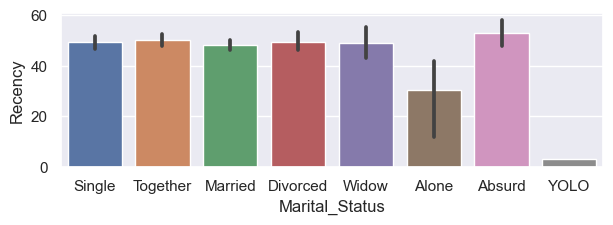

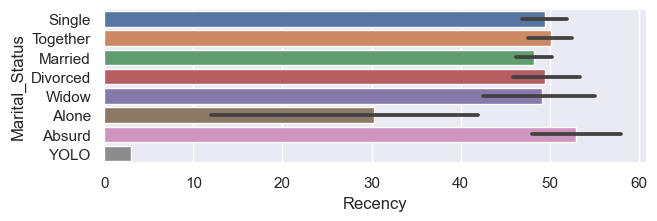

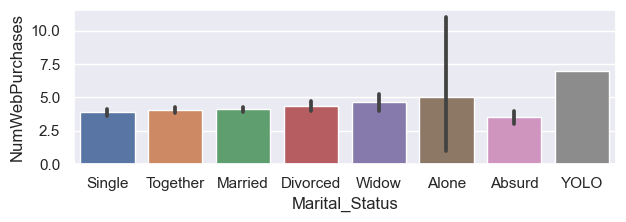

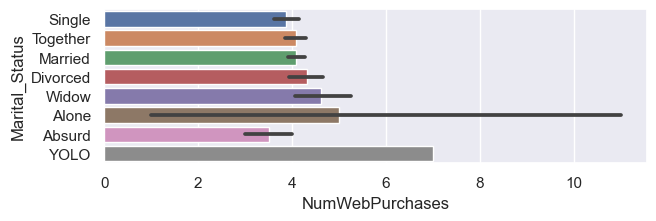

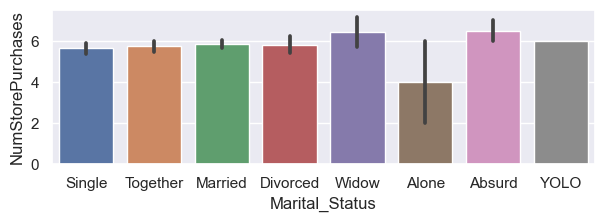

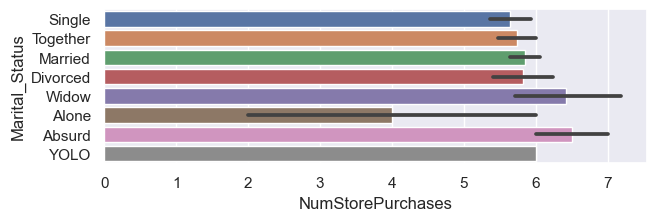

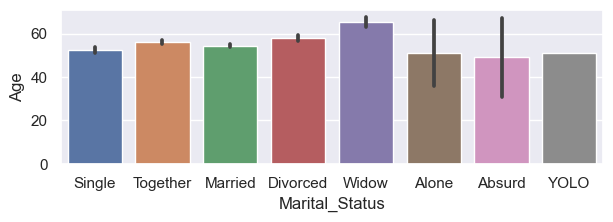

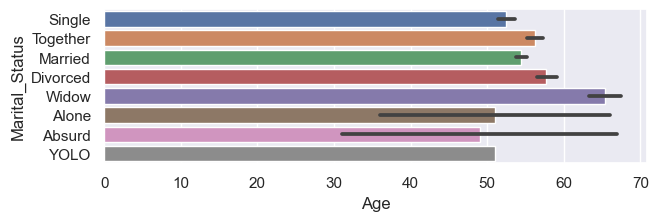

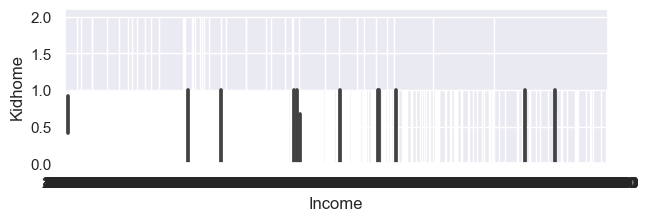

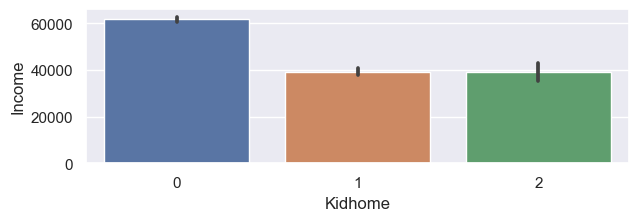

: 

In [ ]:
sns.set(rc={'figure.figsize':(7,2)})
for i in range(len(Gr_names)):
    for j in range(i+1, len(Gr_names)):
        try:
            sns.barplot(x=Gr_names[i], y=Gr_names[j], data=content)
            plt.show()
        except Exception:
            pass
        try:
            sns.barplot(x=Gr_names[j], y=Gr_names[i], data=content)
            plt.show()
        except Exception:
            pass

Как и ожидалось, многие колонки никак не связаны между собой.
Можно увидеть, что увеличение детей в доме связано с понижением доходов и понижением количества покупок, возраст не влияет на уровень дохода и на количество покупок.